In [ ]:
import pandas as pd
from pandas import DataFrame as df
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import shapely
import geojson
import numpy as np

from geojson import Feature, Point, FeatureCollection
from shapely.geometry import Polygon

In [ ]:
data= 'data.geojson'

In [ ]:
geodata = geojson.load(open(data))

In [ ]:
thick_cloud = geodata[12]["geometry"]['coordinates'][0]
# thick_cloud

In [ ]:
thin_cloud = geodata[13]["geometry"]['coordinates'][0]
# thin_cloud

In [ ]:
data1=[]
data2=[]

for it in thin_cloud:
    data1.append(tuple(it))
    

for item in thick_cloud:
    data2.append(tuple(item))
    
# data3
# dta


In [ ]:
polys1 = gpd.GeoSeries([Polygon(data1)])
polys2= gpd.GeoSeries([Polygon(data2)])

Polygon(data1)

In [ ]:
df1 = gpd.GeoDataFrame({'slabel':81, "plabel":8, 'geometry':polys1})
df1.plot(color="green")

In [ ]:
df2 =gpd.GeoDataFrame({'slabel':82, "plabel":8, 'geometry':polys2 })
df2.plot(color="lightgrey")

In [ ]:
df1

In [ ]:
df2

In [ ]:
ax=df1.plot(color='red');
df2.plot(ax=ax, color='green', alpha=0.3)


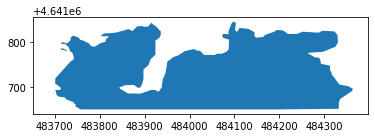

In [333]:
difference=gpd.overlay(df2,df1, how='difference')
difference.plot()

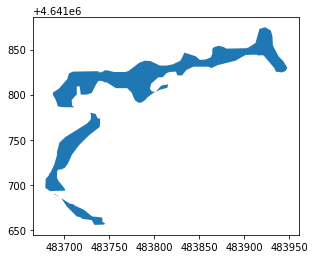

In [334]:
diff=gpd.overlay(df1,df2, how='difference')
diff.plot()

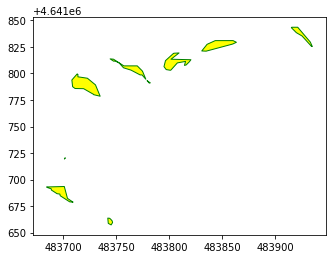

In [335]:
intersection=gpd.overlay(df2,df1, how='intersection')
intersection.plot(color='yellow',edgecolor='green')

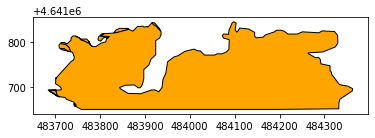

In [336]:
union=gpd.overlay(intersection,df2, how='union')
union.plot(color='orange',edgecolor='black')

In [337]:
union['common_column'] = 1


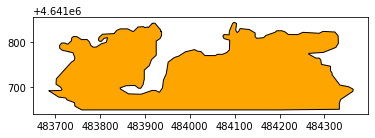

In [338]:
dissolved = union.dissolve(by='common_column')
dissolved.plot(color='orange',edgecolor='black')

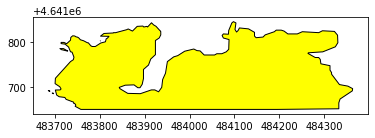

In [339]:
diff = difference.plot(color='yellow', edgecolor='black')
dissolved.plot(ax=ax, color='red', alpha=1) #.set_axis_off();

In [340]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 25))
# difference.plot(ax=ax, color='yellow', edgecolor='green')
# dissolved.plot(ax=ax, color='lightgray', edgecolor='blue', alpha=0.5)


difference = difference.set_crs('epsg:32631')
difference.to_file('dataframew.geojson', driver='GeoJSON') 

In [341]:
# geodata['features'][2]

In [342]:
print(len(geodata['features']))

19


In [343]:
# for i in geodata['features']:
#     print(i['geometry'])

geodata['features'][10]['properties']

{'id': 11, 'Plabel': 1, 'Slabel': 12}

In [349]:
tmp_list = []
for i in range(len(geodata['features'])):
    tmp_list.append(
      {
        'Slabel': geodata['features'][i]['properties']['Slabel'],
        'Plabel': geodata['features'][i]['properties']['Plabel'],
#         'geometry' : geodata['features'][i]['geometry']["coordinates"][0],
        'geometry' : Polygon(geodata['features'][i]['geometry']["coordinates"][0])

       }
    )

my_gdf = gpd.GeoDataFrame(tmp_list)
# my_gdf.plot()
# tmp_list
len(geodata['features'])

19

In [345]:
my_gdf.index = np.arange(1, len(my_gdf)+1)
my_gdf.set_crs('epsg:32631')
my_gdf

,Slabel,Plabel,geometry
0,42,4,"POLYGON ((485086.750 4643117.550, 485086.050 4..."
1,21,2,"POLYGON ((485060.850 4642804.650, 485052.450 4..."
2,11,1,"POLYGON ((484206.850 4643409.450, 484203.350 4..."
3,31,3,"POLYGON ((484956.550 4643213.450, 484941.150 4..."
4,22,2,"POLYGON ((485046.150 4641926.850, 485044.050 4..."
5,32,3,"POLYGON ((483000.750 4642022.750, 482999.350 4..."
6,32,3,"POLYGON ((484446.653 4642848.955, 484445.492 4..."
7,17,1,"POLYGON ((484404.250 4643698.550, 484399.350 4..."
8,13,1,"POLYGON ((483616.050 4643227.450, 483607.650 4..."
9,14,1,"POLYGON ((483364.050 4644150.750, 483326.950 4..."


In [346]:
# my_gdf.plot(color='yellow', edgecolor='green')

In [347]:
# my_gdf.to_file('date.geojson', driver='GeoJSON') 
# my_gdf.to_file('data.shp') 


# def prepare_data(thn_cld=None, thk_cld=None):
    
thin_prop = geodata[thn_cld]["properties"]
thin_geom = geodata[thn_cld]["geometry"]['coordinates'][0]

thick_prop = geodata[thk_cld]["properties"]
thick_geom = geodata[thk_cld]["geometry"]['coordinates'][0]

polys1 = gpd.GeoSeries([Polygon(thin_geom)])
polys2= gpd.GeoSeries([Polygon(thick_geom)])

df1 = gpd.GeoDataFrame({'slabel':81, "plabel":8, 'geometry':polys1})
df2 = gpd.GeoDataFrame({'slabel':82, "plabel":8, 'geometry':polys2})

   
    
#     return df1, df2


NameError: name 'thn_cld' is not defined

In [ ]:
def plot_data(frame1, frame2):
    ax = frame1.plot(color='red');
   
    return frame2.plot(ax=ax, color='green', alpha=0.3)

In [ ]:
# def clean_shape(df1, df2):
difference=gpd.overlay(df2,df1, how='difference')
diff=gpd.overlay(df1,df2, how='difference')

#     checking the intersection
intersection=gpd.overlay(df2,df1, how='intersection')

#     checking the union
union=gpd.overlay(intersection,df2, how='union')

#     disolvin the union of the two polygons
union['common_column'] = 1
dissolved = union.dissolve(by='common_column')



# fig, ax = plt.subplots(1, 1, figsize=(20, 25))
# dissolved.plot(ax=ax, color='yellow', edgecolor='green')
#     dissolved.plot(ax=ax, color='lightgray', edgecolor='blue', alpha=0.5)

x= dissolved.drop(['slabel_1', 'plabel_1', 'slabel_2', 'plabel_2'], axis=1)

x= x.set_crs('epsg:32631')
# x.crs 
union

In [ ]:
x.to_file('dissolved.shp')

In [ ]:
thick_cld =  my_gdf.loc[(my_gdf["Slabel"] == 82)]
thin_cld =  my_gdf.loc[(my_gdf["Slabel"] == 81)]

In [ ]:
thin_cld
thin_cld.plot()

In [ ]:
thin_cld